## **Parámetros del modelo**
En esta sección, definimos los parámetros clave que estructuran el modelo de despacho de buses, tales como el número de buses, tiempos de viaje, costos operativos, y demanda de pasajeros en intervalos definidos.

In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ================================
# 1. Definición de Parámetros
# ================================

intervalo_minutos = 10
hora_inicio = 5 * 60  # 5 am en minutos
hora_fin = 21 * 60    # 9 pm en minutos

# Demanda predicha para todas las rutas y sentidos
demanda_predicha = {
    'PRADERA_27_sentido_1': [36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 46, 47, 48, 49, 49, 49, 50,
                               50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 47, 47, 46, 46, 45, 45,
                               45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
                               45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
                               46, 46, 46, 46, 47, 46, 46, 45, 44, 44, 43, 42, 41, 40, 39, 38,
                               37, 35, 34, 33, 32, 31, 29, 28, 27, 26, 26, 25],
    'PRADERA_27_sentido_2': [36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 46, 47, 48, 49, 49, 49, 50,
                               50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 47, 47, 46, 46, 45, 45,
                               45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
                               45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
                               46, 46, 46, 46, 47, 46, 46, 45, 44, 44, 43, 42, 41, 40, 39, 38,
                               37, 35, 34, 33, 32, 31, 29, 28, 27, 26, 26, 25],
    'PANZENU_sentido_1': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 35, 36, 36,
                           36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 34, 34, 34, 34,
                           34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32,
                           32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36,
                           36, 36, 36, 35, 37, 36, 36, 35, 34, 33, 32, 31, 30, 29, 27, 26, 24,
                           23, 21, 20, 19, 17, 14, 13, 12, 11, 10,  9],
    'PANZENU_sentido_2': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 35, 36, 36,
                           36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 34, 34, 34, 34,
                           34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32,
                           32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36,
                           36, 36, 36, 35, 37, 36, 36, 35, 34, 33, 32, 31, 30, 29, 27, 26, 24,
                           23, 21, 20, 19, 17, 14, 13, 12, 11, 10,  9],
    'SANTANDER_sentido_1': [23, 23, 24, 25, 26, 26, 27, 28, 28, 29, 29, 29, 31, 31, 31, 31, 31,
                             31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 29, 29, 29, 29,
                             29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
                             29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31,
                             31, 31, 31, 31, 32, 31, 31, 31, 30, 30, 29, 28, 28, 27, 26, 25, 24,
                             23, 22, 22, 21, 20, 18, 17, 17, 16, 16, 15],
    'SANTANDER_sentido_2': [23, 23, 24, 25, 26, 26, 27, 28, 28, 29, 29, 29, 31, 31, 31, 31, 31,
                             31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 29, 29, 29, 29,
                             29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
                             29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31,
                             31, 31, 31, 31, 32, 31, 31, 31, 30, 30, 29, 28, 28, 27, 26, 25, 24,
                             23, 22, 22, 21, 20, 18, 17, 17, 16, 16, 15],
    'MOGAMBO_22_sentido_1': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23, 23, 24, 24, 24,
                               24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 22, 21, 21,
                               21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20,
                               20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
                               21, 21, 21, 21, 21, 21, 20, 20, 19, 18, 18, 17, 16, 15, 14, 13, 12,
                               11, 10,  9,  8,  7,  5,  4,  4,  3,  2,  2],
    'MOGAMBO_22_sentido_2': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23, 23, 24, 24, 24,
                               24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 22, 21, 21,
                               21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20,
                               20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
                               21, 21, 21, 21, 21, 21, 20, 20, 19, 18, 18, 17, 16, 15, 14, 13, 12,
                               11, 10,  9,  8,  7,  5,  4,  4,  3,  2,  2],
    'TAMBO_CIRCUNVALAR_sentido_1': [10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 16, 16, 16, 16, 16,
                                     16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14,
                                     14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14,
                                     14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
                                     15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 15, 15, 15, 14, 14, 13, 13,
                                     12, 11, 11, 10, 10,  8,  7,  6,  6,  6,  5],
    'TAMBO_CIRCUNVALAR_sentido_2': [10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 16, 16, 16, 16, 16,
                                     16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14,
                                     14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14,
                                     14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
                                     15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 15, 15, 15, 14, 14, 13, 13,
                                     12, 11, 11, 10, 10,  8,  7,  6,  6,  6,  5],
    'KM30_sentido_1': [3,  3,  4,  4,  5,  6,  6,  7,  7,  8,  9,  9,  7,  8,  8,  8,  9,
                        9,  9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8, 10,  9,  9,  9,
                        8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,
                        8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,  9,
                        9,  9,  9,  9,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1,  0,
                        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    'KM30_sentido_2': [3,  3,  4,  4,  5,  6,  6,  7,  7,  8,  9,  9,  7,  8,  8,  8,  9,
                        9,  9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8, 10,  9,  9,  9,
                        8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,
                        8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,  9,
                        9,  9,  9,  9,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1,  0,
                        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    'DORADO_sentido_1': [11, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 16, 17, 17, 17,
                           17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 15, 14, 14,
                           14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                           15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                           15, 15, 15, 14, 15, 15, 15, 15, 14, 14, 14, 13, 13, 12, 12, 12, 11,
                           11, 10, 10,  9,  9,  7,  7,  7,  7,  6,  6],
    'DORADO_sentido_2': [11, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 16, 17, 17, 17,
                           17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 15, 14, 14,
                           14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                           15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                           15, 15, 15, 14, 15, 15, 15, 15, 14, 14, 14, 13, 13, 12, 12, 12, 11,
                           11, 10, 10,  9,  9,  7,  7,  7,  7,  6,  6],
    'KM 15_sentido_1': [2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7,
                        7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6,
                        6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6,
                        6, 6, 6, 6, 6, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
                        0, 0, 1, 1, 1, 0, 0, 0],
    'KM 15_sentido_2': [2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7,
                        7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6,
                        6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6,
                        6, 6, 6, 6, 6, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
                        0, 0, 1, 1, 1, 0, 0, 0]
}

# Definición de rutas y sus parámetros
rutas = {
    'PRADERA_27': {
        'sentidos': {1: [], 2: []},  
        'B': 8,  # Número de buses disponibles para esta ruta
        'C': 52, # Capacidad de cada bus
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 41, 
            ('C2', 'C1'): 39,
            ('C1', 'C1'): 10,  
            ('C2', 'C2'): 10,
            ('P', 'P'): 0     
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'PANZENU': {
        'sentidos': {1: [], 2: []},
        'B': 7,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 39,
            ('C2', 'C1'): 36,
            ('C1', 'C1'): 10,
            ('C2', 'C2'): 10,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'SANTANDER': {
        'sentidos': {1: [], 2: []},
        'B': 7,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 49,
            ('C2', 'C1'): 47,
            ('C1', 'C1'): 10,
            ('C2', 'C2'): 10,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'MOGAMBO_22': {
        'sentidos': {1: [], 2: []},
        'B': 7,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 28,
            ('C2', 'C1'): 29,
            ('C1', 'C1'): 10,
            ('C2', 'C2'): 10,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'TAMBO_CIRCUNVALAR': {
        'sentidos': {1: [], 2: []},
        'B': 5,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 39,
            ('C2', 'C1'): 34,
            ('C1', 'C1'): 10,
            ('C2', 'C2'): 10,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'KM30': {
        'sentidos': {1: [], 2: []},
        'B': 1,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 40,
            ('C2', 'C1'): 34,
            ('C1', 'C1'): 10,
            ('C2', 'C2'): 10,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'DORADO': {
        'sentidos': {1: [], 2: []},
        'B': 7,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 30,
            ('C2', 'C1'): 30,
            ('C1', 'C1'): 10,
            ('C2', 'C2'): 10,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'KM 15': {
        'sentidos': {1: [], 2: []},
        'B': 2,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 24,
            ('C2', 'C1'): 22,
            ('C1', 'C1'): 10,
            ('C2', 'C2'): 10,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    }
}

# Función para ajustar tiempos de viaje al número de intervalos
def ajustar_tiempos(tiempos, intervalo_minutos=10):
    tiempos_ajustados = {}
    for (origen, destino), tiempo in tiempos.items():
        tiempos_ajustados[(origen, destino)] = int(np.ceil(tiempo / intervalo_minutos))
    return tiempos_ajustados

# Ajustar tiempos de viaje para cada ruta
for ruta, parametros in rutas.items():
    rutas[ruta]['T_l_lprime'] = ajustar_tiempos(parametros['T_l_lprime'], intervalo_minutos)

# Asignar las demandas predichas a cada ruta y sentido
for ruta in rutas.keys():
    for s in [1, 2]:
        key = f"{ruta}_sentido_{s}"
        rutas[ruta]['sentidos'][s] = demanda_predicha[key]


In [ ]:
import matplotlib.pyplot as plt

# Definir parámetros de tiempo
hora_inicio = 5 * 60  # 5:00 AM en minutos
hora_fin = 21 * 60    # 9:00 PM en minutos
intervalo_minutos = 10

fig, ax = plt.subplots(figsize=(14, 8))

# Lista de tiempos en minutos desde la hora de inicio hasta la hora de fin
tiempos = list(range(hora_inicio, hora_fin + intervalo_minutos, intervalo_minutos))

# Convertir los tiempos a formato de horas para el eje x
horas = [f"{t//60:02d}:{t%60:02d}" for t in tiempos]

# Demanda predicha para cada ruta en un solo sentido
for ruta, datos in demanda_predicha.items():
    if 'sentido_1' in ruta:
        ruta_nombre = ruta.replace('_sentido_1', '')
        min_length = min(len(horas), len(datos))
        ax.plot(horas[:min_length], datos[:min_length], label=ruta_nombre)

# Configuración de la gráfica
ax.set_title('Demanda predicha por ruta', fontsize=16)
ax.set_xlabel('Hora del día', fontsize=14)
ax.set_ylabel('Demanda predicha', fontsize=14)
ax.set_xticks([horas.index(f"{h:02d}:00") for h in range(hora_inicio // 60, (hora_fin // 60) + 1)])
ax.set_xticklabels([f"{h:02d}:00" for h in range(hora_inicio // 60, (hora_fin // 60) + 1)])
plt.xticks(rotation=45)
ax.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


## **Ejecución del modelo**
Aquí configuramos y ejecutamos el modelo de optimización, incluyendo la creación del modelo, definición de las variables de decisión y establecimiento de las restricciones. 


In [2]:
def optimizar_ruta(nombre_ruta, parametros_ruta, intervalo_minutos=10, hora_inicio=5*60, hora_fin=21*60,
                  threads=None, heuristics=None, presolve=None, mipfocus=None, mipgap=0.005, timelimit=3600):
    """
    Optimiza el despacho de buses para una ruta específica.

    Args:
        nombre_ruta (str): Nombre de la ruta.
        parametros_ruta (dict): Parámetros específicos de la ruta.
        intervalo_minutos (int, optional): Duración de cada intervalo de tiempo en minutos. Default es 10.
        hora_inicio (int, optional): Hora de inicio en minutos desde medianoche. Default es 5*60 (5 am).
        hora_fin (int, optional): Hora de fin en minutos desde medianoche. Default es 21*60 (9 pm).
        threads (int, optional): Número de hilos para Gurobi. Si es None, usa el valor por defecto.
        heuristics (float, optional): Nivel de heurísticas para Gurobi. Si es None, usa el valor por defecto.
        presolve (int, optional): Nivel de presolve para Gurobi. Si es None, usa el valor por defecto.
        mipfocus (int, optional): Enfoque del MIP para Gurobi. Si es None, usa el valor por defecto.
        mipgap (float, optional): Brecha de MIP permitida. Default es 0.01 (1%).
        timelimit (int, optional): Límite de tiempo en segundos para Gurobi. Default es 3600 (1 hora).

    Returns:
        dict: Resultados de la optimización.
    """
    # Extraer parámetros de la ruta
    S = [1, 2]  # Sentidos de servicio
    D = parametros_ruta['sentidos']  # Demanda por sentido y tiempo
    B = parametros_ruta['B']        # Número de buses
    C = parametros_ruta['C']        # Capacidad de cada bus
    T_l_lprime = parametros_ruta['T_l_lprime']  # Tiempos de viaje en intervalos
    c_mov = parametros_ruta['c_mov']
    c_bus = parametros_ruta['c_bus']
    c_ingreso = parametros_ruta['c_ingreso']
    c_espera = parametros_ruta['c_espera']

    # Definir intervalos de tiempo
    N = int((hora_fin - hora_inicio) / intervalo_minutos)  # Número de intervalos
    T = list(range(N+1))  # 0,1,...,N

    # Ubicaciones (suponiendo las mismas para todas las rutas)
    L = ['P', 'C1', 'C2']

    # Definir conjuntos de buses
    K = list(range(1, B+1))  # 1,2,...,B

    # Definir arcos y parámetros delta
    arcos = []
    c = {}
    delta = {}
    for k in K:
        for l in L:
            for t in T:
                for l_prime in L:
                    key = (l, l_prime)
                    tiempo_viaje = T_l_lprime.get(key, N+1)  # Movimiento inválido si no está definido
                    t_prime = t + tiempo_viaje
                    if t_prime <= N and tiempo_viaje > 0:
                        arco = (k, l, t, l_prime, t_prime)
                        arcos.append(arco)
                        # Asignar costos
                        if l != l_prime:
                            c[arco] = c_mov
                        else:
                            if l != 'P':
                                c[arco] = c_espera
                            else:
                                c[arco] = 0
                        # Asignar delta
                        if (l, l_prime) in [('C1', 'C2'), ('C2', 'C1')]:
                            if (l, l_prime) == ('C1', 'C2'):
                                delta[(arco, 1)] = 1
                                delta[(arco, 2)] = 0
                            else:
                                delta[(arco, 1)] = 0
                                delta[(arco, 2)] = 1
                        else:
                            delta[(arco, 1)] = 0
                            delta[(arco, 2)] = 0

    # Inicializar demanda para cada sentido y tiempo
    demanda = {}
    for s in S:
        for t in T:
            demanda[s, t] = D[s][t] if t < len(D[s]) else 0

    # Crear el modelo
    model = gp.Model(f"Despacho_de_Buses_{nombre_ruta}")

    # Variables de decisión
    x = model.addVars(arcos, vtype=GRB.BINARY, name="x")
    L_var = model.addVars(K, L, T, vtype=GRB.BINARY, name="L")
    y = model.addVars(S, T, vtype=GRB.CONTINUOUS, lb=0, name="y")
    p = model.addVars(K, S, T, vtype=GRB.CONTINUOUS, lb=0, name="p")
    z = model.addVars(K, T, vtype=GRB.BINARY, name="z")  # Bus en operación

    # Función objetivo para maximizar ingresos menos costos
    model.setObjective(
        c_ingreso * gp.quicksum(p[k, s, t] for k in K for s in S for t in T) -  # Ingresos por pasajeros transportados
        (gp.quicksum(c_bus * z[k, t] for k in K for t in T) +                # Costos por mantener el bus en operación
         gp.quicksum(c[arco] * x[arco] for arco in arcos)),                  # Costos de movimiento y espera
        GRB.MAXIMIZE
    )

    # ================================
    # 2. Definición de Restricciones
    # ================================

    # 1. Ubicación inicial de los buses
    for k in K:
        model.addConstr(L_var[k, 'P', 0] == 1, name=f"ubicacion_inicial_{k}")
        for l in L:
            if l != 'P':
                model.addConstr(L_var[k, l, 0] == 0, name=f"ubicacion_inicial_{k}_{l}")

    # 2. Exclusividad de ubicación
    for k in K:
        for t in T:
            model.addConstr(
                gp.quicksum(L_var[k, l, t] for l in L) <= 1,
                name=f"exclusividad_{k}_{t}"
            )

    # 3. Actualización de presencia de los buses
    for k in K:
        for l in L:
            for t in T[:-1]:
                salidas = gp.quicksum(
                    x[arco]
                    for arco in arcos
                    if arco[0] == k and arco[1] == l and arco[2] == t
                )
                llegadas = gp.quicksum(
                    x[arco]
                    for arco in arcos
                    if arco[0] == k and arco[3] == l and arco[4] == t + 1
                )
                model.addConstr(
                    L_var[k, l, t+1] == L_var[k, l, t] - salidas + llegadas,
                    name=f"actualizacion_{k}_{l}_{t}"
                )

    # 4. Movimiento solo si el bus está presente
    for arco in arcos:
        model.addConstr(
            x[arco] <= L_var[arco[0], arco[1], arco[2]],
            name=f"movimiento_{arco}"
        )

    # 5. Definición de z[k, t]
    for k in K:
        for t in T:
            model.addConstr(
                z[k, t] == 1 - L_var[k, 'P', t],
                name=f"bus_en_operacion_{k}_{t}"
            )

    # 6. Capacidad del bus en cada intervalo
    for k in K:
        for t in T:
            model.addConstr(
                gp.quicksum(p[k, s, t] for s in S) <= C * z[k, t],
                name=f"capacidad_{k}_{t}"
            )

    # 7. Satisfacción de la demanda
    for s in S:
        for t in T:
            model.addConstr(
                gp.quicksum(p[k, s, t] for k in K) + y[s, t] == demanda[s, t],
                name=f"demanda_{s}_{t}"
            )

    # 8. Consistencia entre movimiento y atención de pasajeros
    for k in K:
        for s in S:
            for t in T:
                # Pasajeros transportados solo si el bus está realizando un movimiento en ese sentido
                movimientos_s = gp.quicksum(
                    x[arco] * delta.get((arco, s), 0)
                    for arco in arcos
                    if arco[0] == k and arco[2] <= t < arco[4]
                )
                model.addConstr(
                    p[k, s, t] <= C * movimientos_s,
                    name=f"consistencia_{k}_{s}_{t}"
                )

    # 9. No exceder la capacidad del bus acumulada
    for k in K:
        for s in S:
            for t in T:
                pasajeros_acumulados = gp.quicksum(p[k, s, tau] for tau in T if tau <= t)
                viajes_s = gp.quicksum(
                    x[arco]
                    for arco in arcos
                    if arco[0] == k and delta.get((arco, s), 0) == 1 and arco[2] <= t
                )
                model.addConstr(
                    pasajeros_acumulados <= C * viajes_s,
                    name=f"capacidad_acumulada_{k}_{s}_{t}"
                )

    # ================================
    # 3. Parámetros de Optimización
    # ================================

    # Ajustar parámetros de Gurobi si se proporcionan
    if threads is not None:
        model.setParam('Threads', threads)
    if heuristics is not None:
        model.setParam('Heuristics', heuristics)
    if presolve is not None:
        model.setParam('Presolve', presolve)
    if mipfocus is not None:
        model.setParam('MIPFocus', mipfocus)
    if mipgap is not None:
        model.setParam('MIPGap', mipgap)

    model.setParam('TimeLimit', timelimit)    # Límite de tiempo en segundos

    # Optimizar el modelo
    model.optimize()

    # ================================
    # 4. Procesamiento de Resultados
    # ================================

    resultados = {}
    if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT:
        resultados['estado'] = model.status
        resultados['obj_val'] = model.ObjVal
        resultados['runtime'] = model.Runtime
        resultados['gap'] = model.MIPGap
        resultados['iteraciones'] = model.IterCount
        resultados['variables'] = model.NumVars
        resultados['restricciones'] = model.NumConstrs


        resultados['pasajeros_atendidos'] = {}
        resultados['pasajeros_no_satisfechos'] = {}
        resultados['nivel_servicio'] = {}
        for s in S:
            demanda_total = sum(demanda[s, t] for t in T)
            atendida = demanda_total - sum(y[s, t].X for t in T)
            resultados['pasajeros_atendidos'][s] = atendida
            resultados['pasajeros_no_satisfechos'][s] = sum(y[s, t].X for t in T)
            resultados['nivel_servicio'][s] = (atendida / demanda_total) * 100 if demanda_total > 0 else 0
        resultados['nivel_servicio_global'] = sum(resultados['pasajeros_atendidos'].values()) / sum(
            demanda[s, t] for s in S for t in T
        ) * 100 if sum(demanda[s, t] for s in S for t in T) > 0 else 0

        # Métricas por bus
        resultados['metrics_bus'] = {}
        distancia_sentido = {1: 20, 2: 22}  # Distancias en km para cada sentido (pueden variar por ruta)
        for k in K:
            # Total de pasajeros transportados
            pasajeros_k = sum(p[k, s, t].X for s in S for t in T)

            # Total de viajes realizados (cualquier movimiento)
            viajes_k = sum(x[arco].X for arco in arcos if arco[0] == k and x[arco].X > 0.5)

            # Total de intervalos en operación
            intervalos_operacion = sum(z[k, t].X for t in T)

            # Total de intervalos realizando trayectos de recogida de pasajeros
            intervalos_recogida = 0
            for arco in arcos:
                if arco[0] == k and x[arco].X > 0.5:
                    sentido = None
                    for s in S:
                        if delta.get((arco, s), 0) == 1:
                            sentido = s
                            break
                    if sentido:
                        intervalos_recogida += T_l_lprime.get((arco[1], arco[3]), 0)

            # Utilización como porcentaje
            utilizacion_k = (intervalos_recogida * intervalo_minutos) / (intervalos_operacion * intervalo_minutos) * 100 if intervalos_operacion > 0 else 0

            # Kilómetros recorridos en trayectos de recogida de pasajeros
            km_k = 0
            for s in S:
                viajes_k_s = sum(
                    x[arco].X for arco in arcos
                    if arco[0] == k and delta.get((arco, s), 0) == 1 and x[arco].X > 0.5
                )
                km_k += viajes_k_s * distancia_sentido[s]
            ipk_k = pasajeros_k / km_k if km_k > 0 else 0

            resultados['metrics_bus'][k] = {
                'Pasajeros Transportados': pasajeros_k,
                'Viajes Realizados': viajes_k,
                'Capacidad de bus usada': pasajeros_k / (viajes_k * C) * 100 if viajes_k > 0 else 0,
                'Utilización (%)': utilizacion_k,
                'Kilómetros Recorridos': km_k,
                'IPK (Pasajeros/km)': ipk_k,
            }
    else:
        resultados['estado'] = model.status
        print(f"El modelo para la ruta {nombre_ruta} no encontró una solución óptima.")

    return resultados, model, x, L_var, p, y, z, arcos, delta, T_l_lprime, K, L, S, T, demanda


In [3]:
# ================================
# 3. Ejecución del Modelo para Todas las Rutas
# ================================

# Almacenar resultados de todas las rutas
resultados_totales = {}

# Lista de rutas a optimizar
lista_rutas = list(rutas.keys())

for ruta in lista_rutas:
    print(f"Optimizing route: {ruta}")
    resultados, modelo, x, L_var, p, y, z, arcos, delta, T_l_lprime, K, L, S, T, demanda = optimizar_ruta(ruta, rutas[ruta])
    
    resultados_totales[ruta] = {
        'resultados': resultados,
        'modelo': modelo,
        'variables': {
            'x': x,
            'L_var': L_var,
            'p': p,
            'y': y,
            'z': z
        },
        'arcos': arcos,
        'delta': delta,
        'T_l_lprime': T_l_lprime,
        'K': K,
        'L': L,
        'S': S,
        'T': T,
        'demanda': demanda
    }

    print(f"Completed optimization for route: {ruta}\n")


Optimizing route: PRADERA_27
Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06
Set parameter MIPGap to value 0.005
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 14010 rows, 10906 columns and 193842 nonzeros
Model fingerprint: 0x7855b2b9
Variable types: 1746 continuous, 9160 integer (9160 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 2792 rows and 2746 columns
Presolve time: 0.43s
Presolved: 11218 rows, 8160 columns, 163487 nonzeros
Variable types: 1504 continuous, 6656 integer (6640 binary)
Found heuristic solution: objective 4223.0000000

Root simplex l

## **Métricas de desempeño**
Evaluamos el desempeño del modelo mediante métricas clave, como el porcentaje de demanda atendida, buses despachados y costos operativos. Estas métricas permiten analizar la efectividad del modelo en satisfacer la demanda y optimizar los recursos.

In [7]:
# Función para presentar resultados computacionales
def presentar_resultados_computacionales(nombre_ruta, resultados):
    print(f"Resultados Computacionales para la Ruta: {nombre_ruta}")
    estado = resultados['estado']
    if estado == GRB.OPTIMAL:
        estado_opt = "Óptimo"
    elif estado == GRB.TIME_LIMIT:
        estado_opt = "Límite de tiempo alcanzado"
    else:
        estado_opt = f"Estado {estado}"
    print(f"  Estado de Optimización: {estado_opt}")
    print(f"  Tiempo de Ejecución: {resultados['runtime']:.2f} segundos")
    print(f"  Gap de MIP: {resultados['gap']*100:.2f}%")
    print(f"  Valor Óptimo: {resultados['obj_val']:.2f}")
    print(f"  Número de Iteraciones: {resultados['iteraciones']}")
    print(f"  Número de Variables: {resultados['variables']}")
    print(f"  Número de Restricciones: {resultados['restricciones']}")
    print("")

# Función para presentar métricas globales
def presentar_metricas_globales(nombre_ruta, resultados):
    print(f"Métricas Globales para la Ruta: {nombre_ruta}")
    nivel_servicio_global = resultados['nivel_servicio_global']
    print(f"  Nivel de Servicio Global: {nivel_servicio_global:.2f}%")
    pasajeros_totales = sum(m['Pasajeros Transportados'] for m in resultados['metrics_bus'].values())
    viajes_totales = sum(m['Viajes Realizados'] for m in resultados['metrics_bus'].values())
    km_totales = sum(m['Kilómetros Recorridos'] for m in resultados['metrics_bus'].values())
    utilizacion_promedio = sum(m['Utilización (%)'] for m in resultados['metrics_bus'].values()) / len(resultados['metrics_bus'])
    ipk_global = pasajeros_totales / km_totales if km_totales > 0 else 0
    print(f"  Pasajeros Totales Transportados: {pasajeros_totales}")
    buses_activos = [m['Capacidad de bus usada'] for m in resultados['metrics_bus'].values() if m['Viajes Realizados'] > 0]
    capacidad_promedio = sum(buses_activos) / len(buses_activos) if buses_activos else 0

    print(f"  Viajes Totales Realizados: {viajes_totales}")
    print(f"  Kilómetros Totales Recorridos: {km_totales:.2f} km")
    print(f"  Utilización Promedio de los Buses: {utilizacion_promedio:.2f}%")
    print(f"  IPK Global (Pasajeros/km): {ipk_global:.2f}")
    print(f"  Capacidad Promedio de bus usada: {capacidad_promedio:.2f}%")
    print("")

# Función para presentar métricas por bus
def presentar_metricas_por_bus(nombre_ruta, resultados):
    print(f"Métricas por Bus para la Ruta: {nombre_ruta}")
    for k, m in resultados['metrics_bus'].items():
        print(f"  Bus {k}:")
        print(f"    - Pasajeros Transportados: {m['Pasajeros Transportados']}")
        print(f"    - Viajes Realizados: {m['Viajes Realizados']}")
        print(f"    - Utilización: {m['Utilización (%)']:.2f}%")
        print(f"    - Kilómetros Recorridos: {m['Kilómetros Recorridos']:.2f} km")
        print(f"    - IPK (Pasajeros/km): {m['IPK (Pasajeros/km)']:.2f}")
        print(f"   - Capacidad de bus usada: {m['Capacidad de bus usada']:.2f}%")
    print("")

# Presentar resultados para cada ruta
for ruta in lista_rutas:
    resultados = resultados_totales[ruta]['resultados']
    presentar_resultados_computacionales(ruta, resultados)
    presentar_metricas_globales(ruta, resultados)
    presentar_metricas_por_bus(ruta, resultados)


Resultados Computacionales para la Ruta: PRADERA_27
  Estado de Optimización: Óptimo
  Tiempo de Ejecución: 177.91 segundos
  Gap de MIP: 0.49%
  Valor Óptimo: 10811.00
  Número de Iteraciones: 353761.0
  Número de Variables: 10906
  Número de Restricciones: 14010
  Número de Nodos: 193.0
  Número de Arcos: 6056

Métricas Globales para la Ruta: PRADERA_27
  Nivel de Servicio Global: 97.49%
  Pasajeros Totales Transportados: 8033.0
  Viajes Totales Realizados: 166.0
  Kilómetros Totales Recorridos: 3256.00 km
  Utilización Promedio de los Buses: 96.91%
  IPK Global (Pasajeros/km): 2.47
  Capacidad Promedio de bus usada: 92.97%

Métricas por Bus para la Ruta: PRADERA_27
  Bus 1:
    - Pasajeros Transportados: 1040.0
    - Viajes Realizados: 21.0
    - Utilización: 97.83%
    - Kilómetros Recorridos: 420.00 km
    - IPK (Pasajeros/km): 2.48
   - Capacidad de bus usada: 95.24%
  Bus 2:
    - Pasajeros Transportados: 884.0
    - Viajes Realizados: 19.0
    - Utilización: 96.25%
    - Kilóme

## **Visualización de resultados**
En esta sección, se visualizan los resultados mediante gráficos para una interpretación más clara del desempeño del modelo.

Visualizing results for route: PRADERA_27


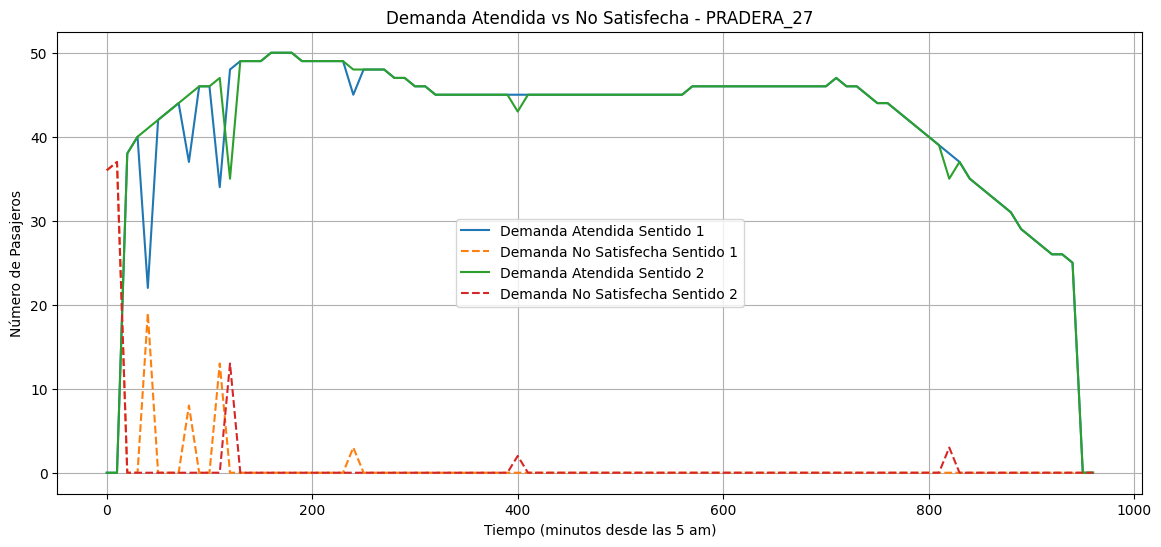

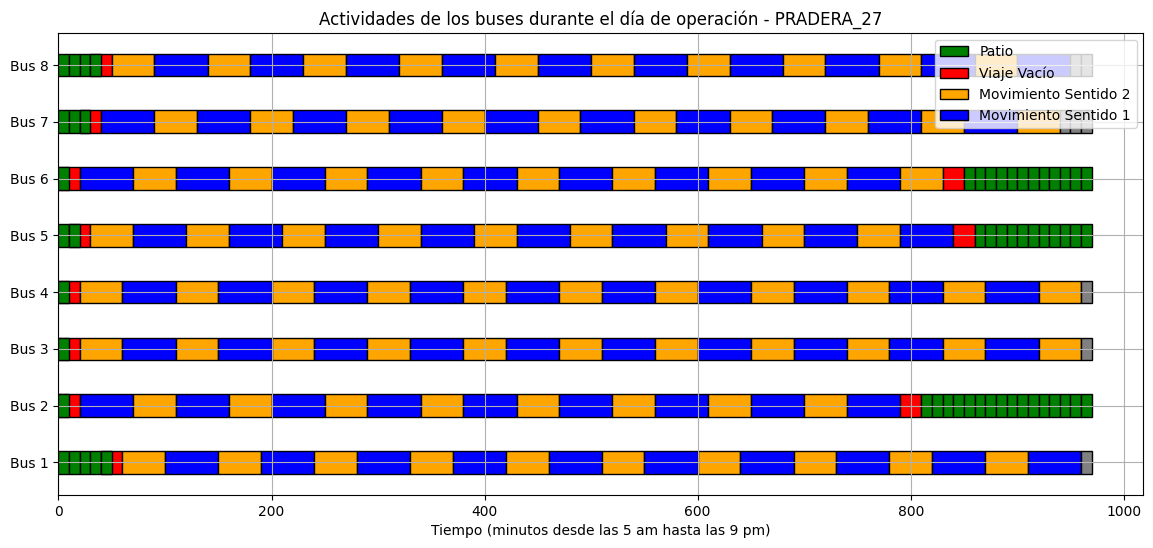


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 1040.0, 'Viajes Realizados': 21.0, 'Capacidad de bus usada': 95.23809523809523, 'Utilización (%)': 97.82608695652173, 'Kilómetros Recorridos': 420.0, 'IPK (Pasajeros/km)': 2.4761904761904763}
Bus 2: {'Pasajeros Transportados': 884.0, 'Viajes Realizados': 19.0, 'Capacidad de bus usada': 89.47368421052632, 'Utilización (%)': 96.25, 'Kilómetros Recorridos': 356.0, 'IPK (Pasajeros/km)': 2.4831460674157304}
Bus 3: {'Pasajeros Transportados': 1092.0, 'Viajes Realizados': 22.0, 'Capacidad de bus usada': 95.45454545454545, 'Utilización (%)': 97.91666666666666, 'Kilómetros Recorridos': 442.0, 'IPK (Pasajeros/km)': 2.4705882352941178}
Bus 4: {'Pasajeros Transportados': 1065.0, 'Viajes Realizados': 22.0, 'Capacidad de bus usada': 93.0944055944056, 'Utilización (%)': 97.91666666666666, 'Kilómetros Recorridos': 442.0, 'IPK (Pasajeros/km)': 2.409502262443439}
Bus 5: {'Pasajeros Transportados': 936.0, 'Viajes Realizados': 20.0, 'Capacidad de bus u

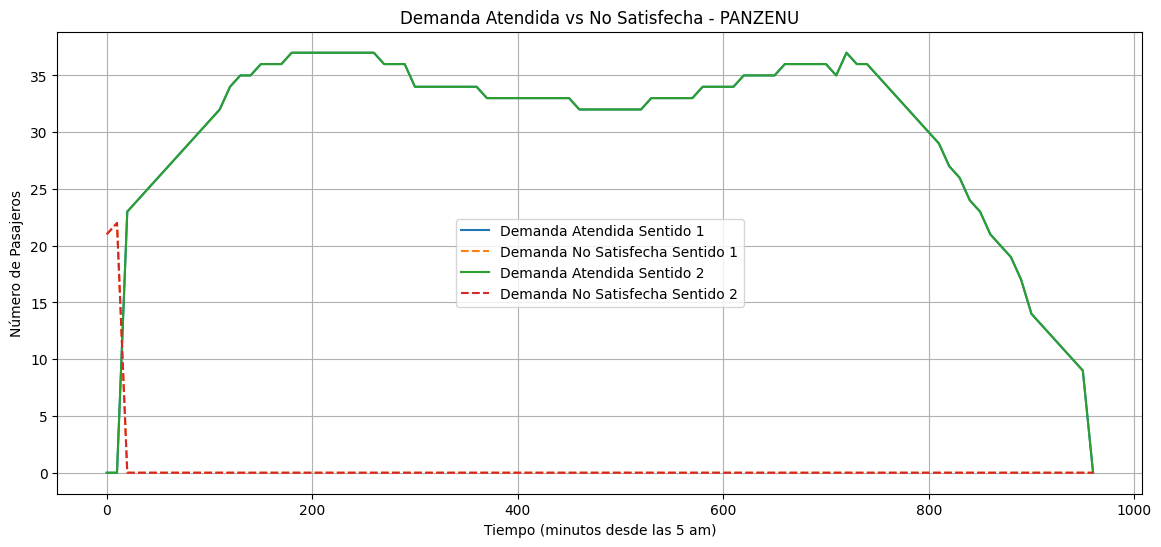

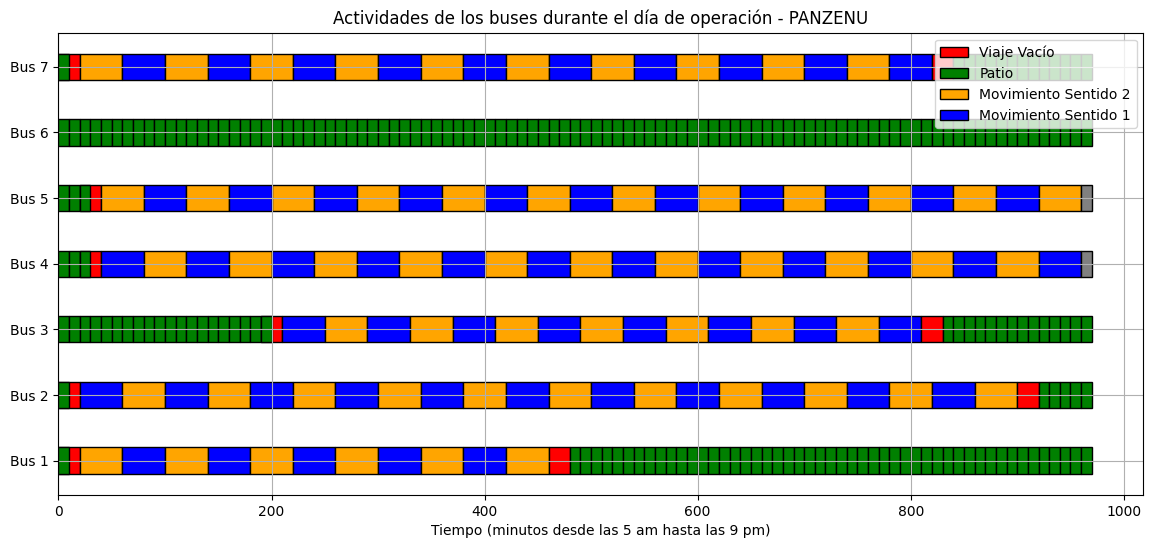


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 572.0, 'Viajes Realizados': 13.0, 'Capacidad de bus usada': 84.61538461538461, 'Utilización (%)': 93.61702127659575, 'Kilómetros Recorridos': 232.0, 'IPK (Pasajeros/km)': 2.4655172413793105}
Bus 2: {'Pasajeros Transportados': 1128.999957233455, 'Viajes Realizados': 23.999997698152, 'Capacidad de bus usada': 90.46474883944131, 'Utilización (%)': 96.70330157492747, 'Kilómetros Recorridos': 461.9999746760053, 'IPK (Pasajeros/km)': 2.4437229851045084}
Bus 3: {'Pasajeros Transportados': 751.0, 'Viajes Realizados': 17.0, 'Capacidad de bus usada': 84.95475113122171, 'Utilización (%)': 95.23809523809523, 'Kilómetros Recorridos': 314.0, 'IPK (Pasajeros/km)': 2.3917197452229297}
Bus 4: {'Pasajeros Transportados': 1177.0000196496208, 'Viajes Realizados': 24.0, 'Capacidad de bus usada': 94.31089901038628, 'Utilización (%)': 97.87234042553192, 'Kilómetros Recorridos': 482.0, 'IPK (Pasajeros/km)': 2.441908754459794}
Bus 5: {'Pasajeros Transportad

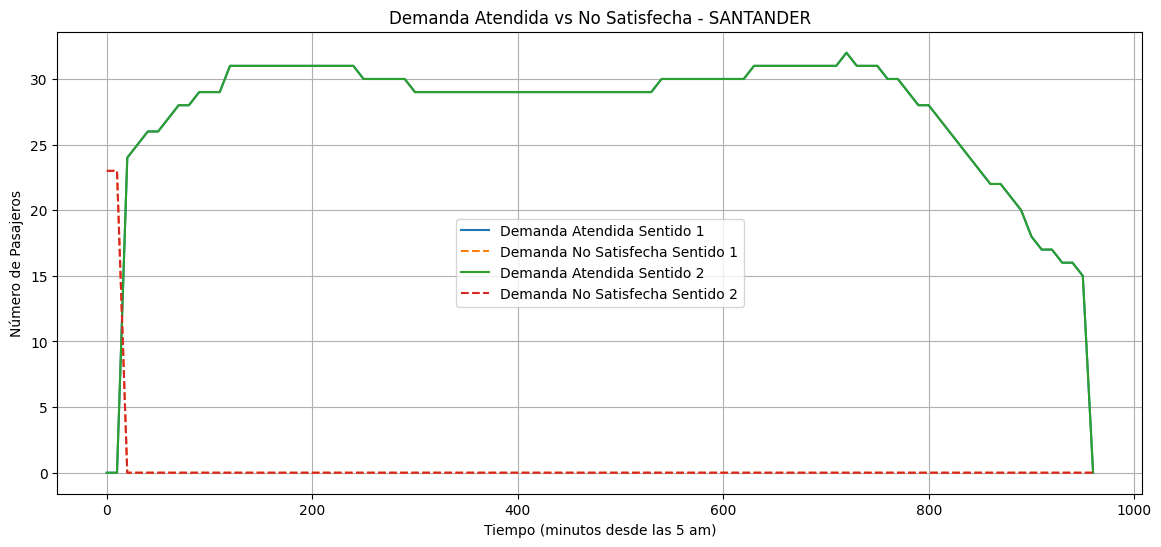

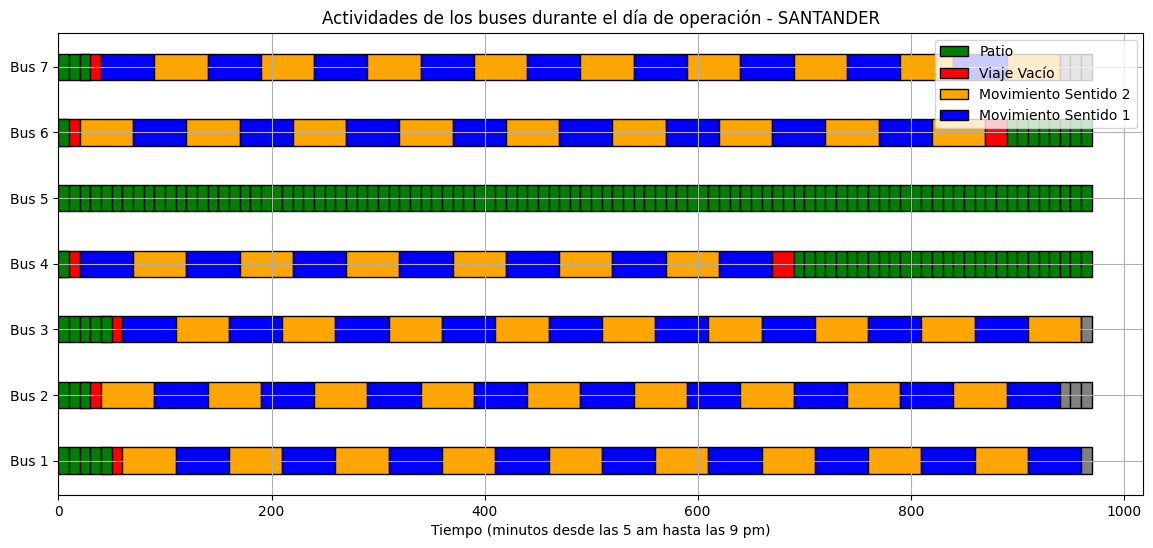


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 936.0, 'Viajes Realizados': 19.0, 'Capacidad de bus usada': 94.73684210526315, 'Utilización (%)': 97.82608695652173, 'Kilómetros Recorridos': 378.0, 'IPK (Pasajeros/km)': 2.4761904761904763}
Bus 2: {'Pasajeros Transportados': 936.0, 'Viajes Realizados': 19.0, 'Capacidad de bus usada': 94.73684210526315, 'Utilización (%)': 95.74468085106383, 'Kilómetros Recorridos': 378.0, 'IPK (Pasajeros/km)': 2.4761904761904763}
Bus 3: {'Pasajeros Transportados': 936.0, 'Viajes Realizados': 19.0, 'Capacidad de bus usada': 94.73684210526315, 'Utilización (%)': 97.82608695652173, 'Kilómetros Recorridos': 378.0, 'IPK (Pasajeros/km)': 2.4761904761904763}
Bus 4: {'Pasajeros Transportados': 676.0, 'Viajes Realizados': 15.0, 'Capacidad de bus usada': 86.66666666666667, 'Utilización (%)': 95.58823529411765, 'Kilómetros Recorridos': 272.0, 'IPK (Pasajeros/km)': 2.485294117647059}
Bus 5: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de 

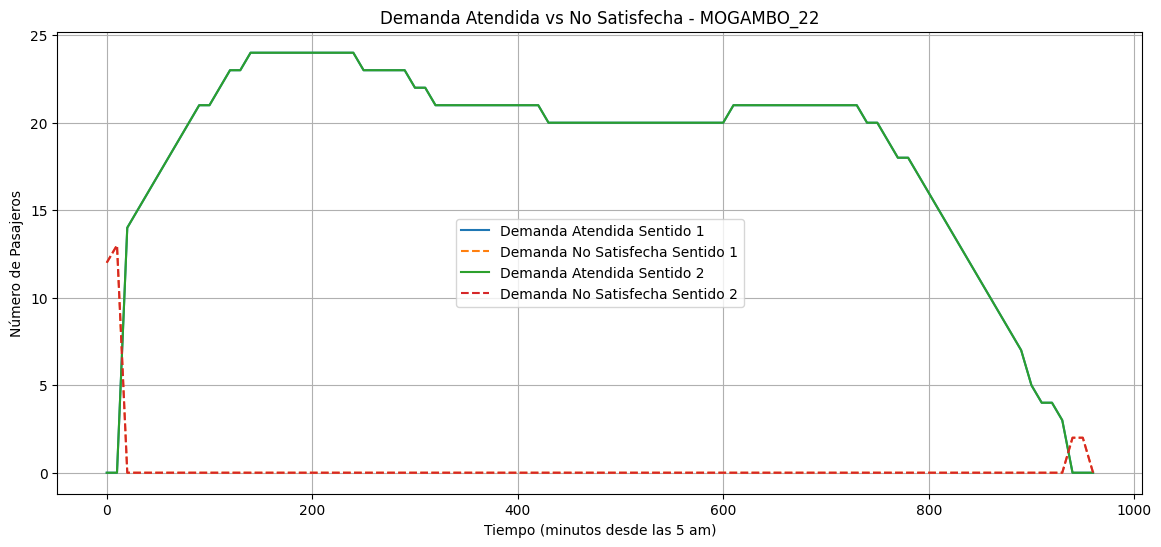

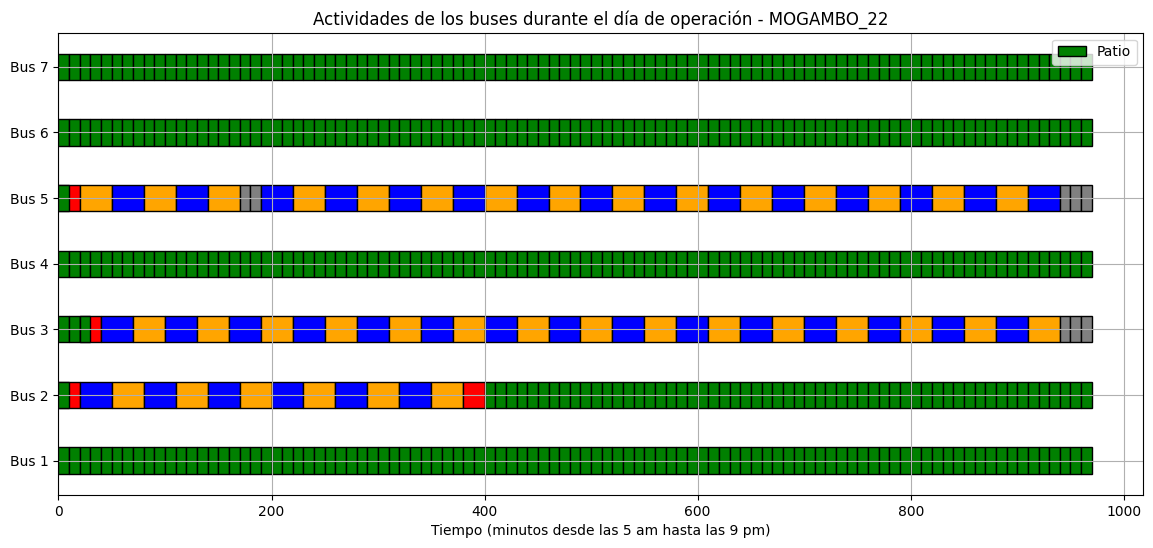


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0, 'Kilómetros Recorridos': 0, 'IPK (Pasajeros/km)': 0}
Bus 2: {'Pasajeros Transportados': 621.9999999999999, 'Viajes Realizados': 14.0, 'Capacidad de bus usada': 85.43956043956042, 'Utilización (%)': 92.3076923076923, 'Kilómetros Recorridos': 252.0, 'IPK (Pasajeros/km)': 2.468253968253968}
Bus 3: {'Pasajeros Transportados': 1448.0, 'Viajes Realizados': 31.0, 'Capacidad de bus usada': 89.82630272952854, 'Utilización (%)': 95.74468085106383, 'Kilómetros Recorridos': 630.0, 'IPK (Pasajeros/km)': 2.2984126984126982}
Bus 4: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0, 'Kilómetros Recorridos': 0, 'IPK (Pasajeros/km)': 0}
Bus 5: {'Pasajeros Transportados': 1448.0, 'Viajes Realizados': 31.0, 'Capacidad de bus usada': 89.82630272952854, 'Utilización (%)': 93.75, 'Kilómetros Recorridos': 630.0, 'IPK (Pas

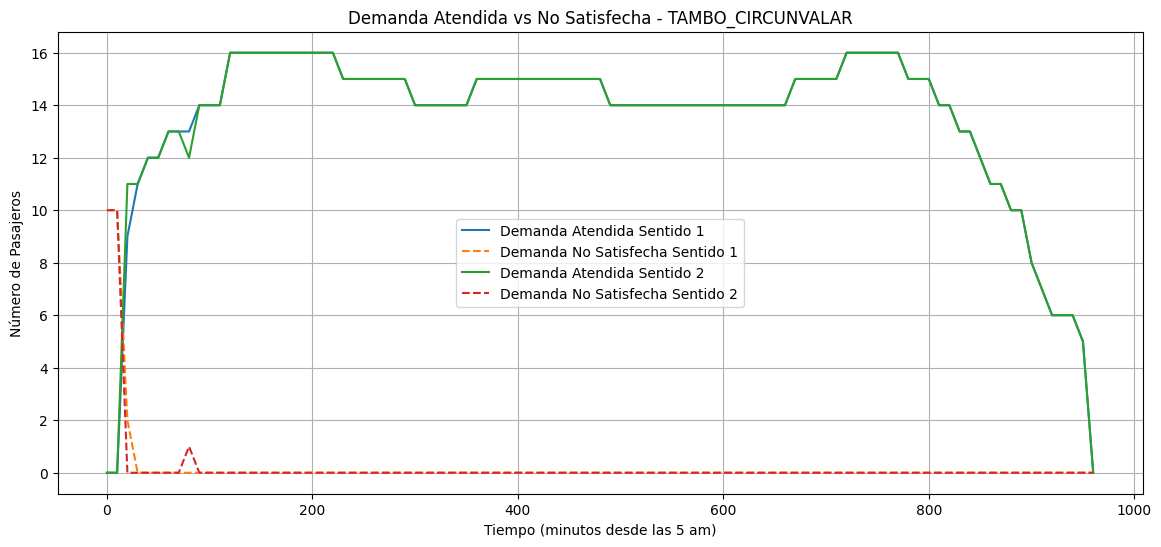

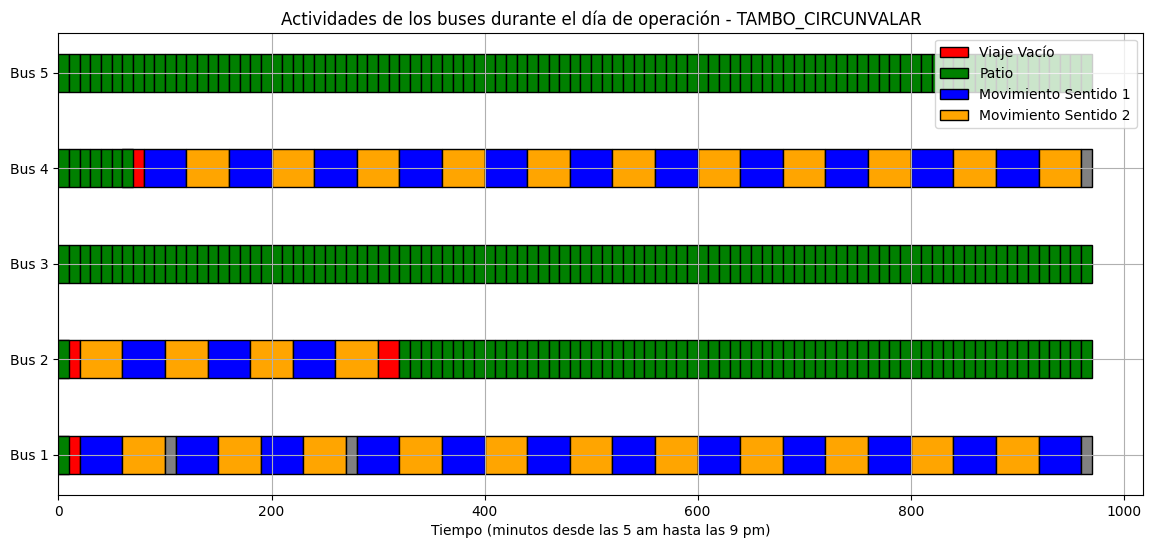


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 1145.0, 'Viajes Realizados': 24.0, 'Capacidad de bus usada': 91.74679487179486, 'Utilización (%)': 95.83333333333334, 'Kilómetros Recorridos': 482.0, 'IPK (Pasajeros/km)': 2.37551867219917}
Bus 2: {'Pasajeros Transportados': 361.0000009432422, 'Viajes Realizados': 9.0, 'Capacidad de bus usada': 77.1367523382996, 'Utilización (%)': 90.32258064516128, 'Kilómetros Recorridos': 148.0, 'IPK (Pasajeros/km)': 2.4391891955624474}
Bus 3: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0, 'Kilómetros Recorridos': 0, 'IPK (Pasajeros/km)': 0}
Bus 4: {'Pasajeros Transportados': 1092.9999999998304, 'Viajes Realizados': 23.0, 'Capacidad de bus usada': 91.38795986620656, 'Utilización (%)': 97.77777777777777, 'Kilómetros Recorridos': 462.0, 'IPK (Pasajeros/km)': 2.3658008658004985}
Bus 5: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0

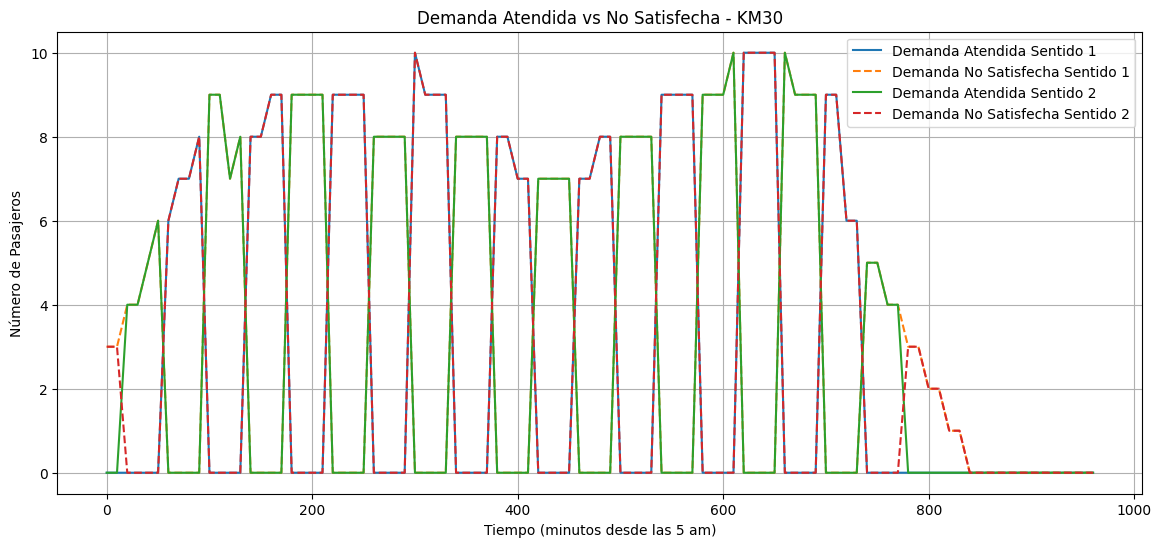

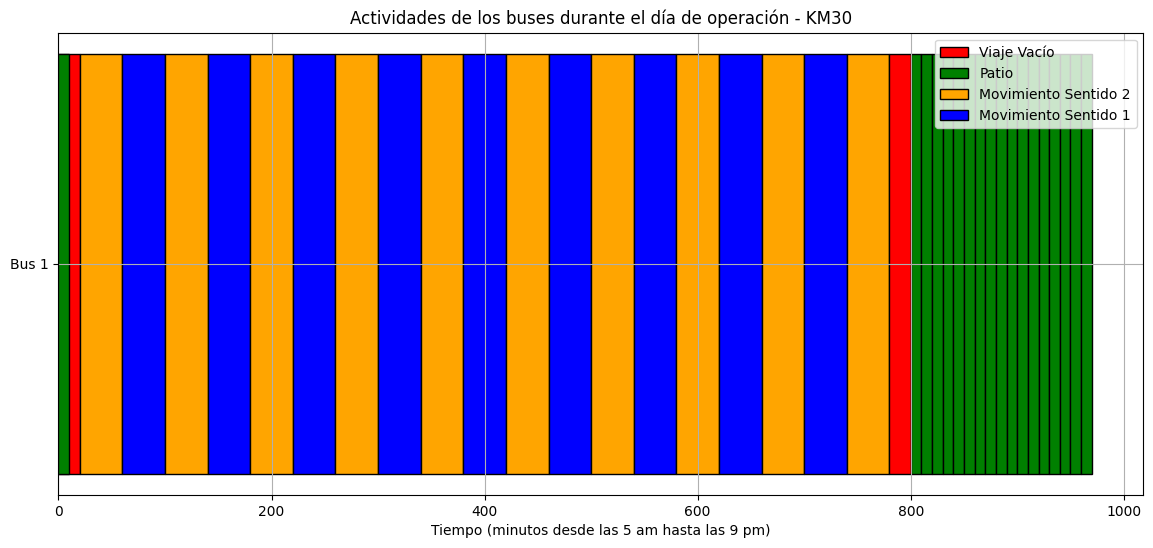


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 605.0, 'Viajes Realizados': 21.0, 'Capacidad de bus usada': 55.40293040293041, 'Utilización (%)': 96.20253164556962, 'Kilómetros Recorridos': 400.0, 'IPK (Pasajeros/km)': 1.5125}
Completed visualization for route: KM30

Visualizing results for route: DORADO


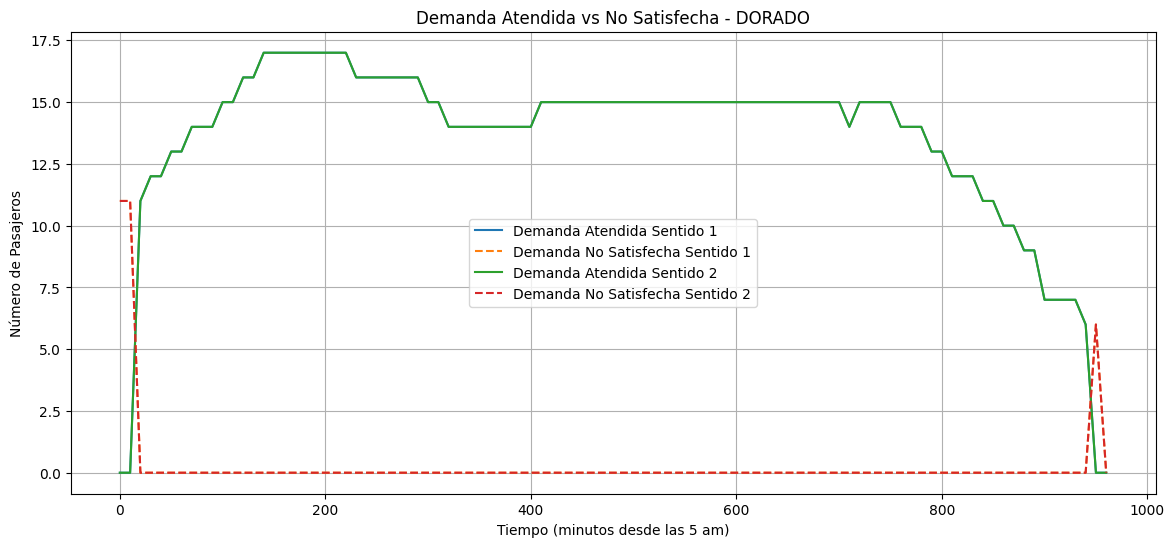

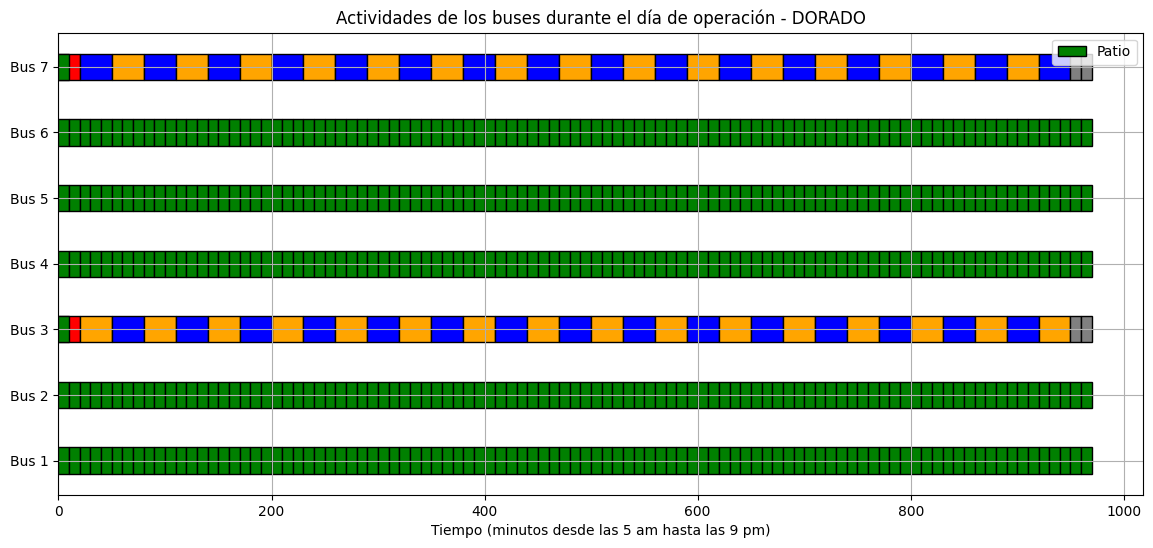


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0, 'Kilómetros Recorridos': 0, 'IPK (Pasajeros/km)': 0}
Bus 2: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0, 'Kilómetros Recorridos': 0, 'IPK (Pasajeros/km)': 0}
Bus 3: {'Pasajeros Transportados': 1308.0, 'Viajes Realizados': 32.0, 'Capacidad de bus usada': 78.60576923076923, 'Utilización (%)': 96.875, 'Kilómetros Recorridos': 652.0, 'IPK (Pasajeros/km)': 2.0061349693251533}
Bus 4: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0, 'Kilómetros Recorridos': 0, 'IPK (Pasajeros/km)': 0}
Bus 5: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 'Utilización (%)': 0, 'Kilómetros Recorridos': 0, 'IPK (Pasajeros/km)': 0}
Bus 6: {'Pasajeros Transportados': 0.0, 'Viajes Realizados': 0, 'Capacidad de bus usada': 0, 

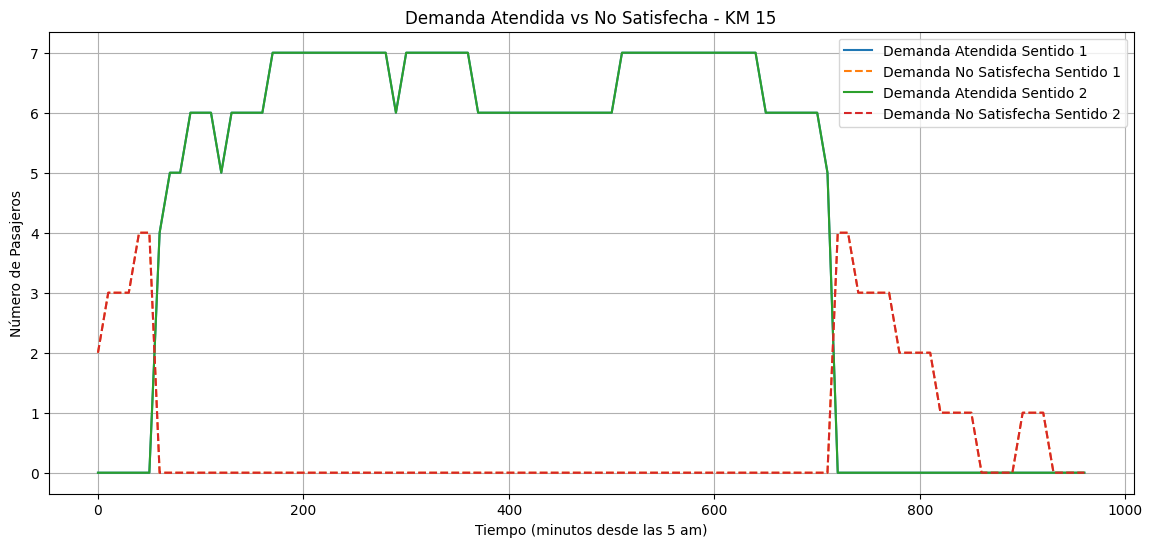

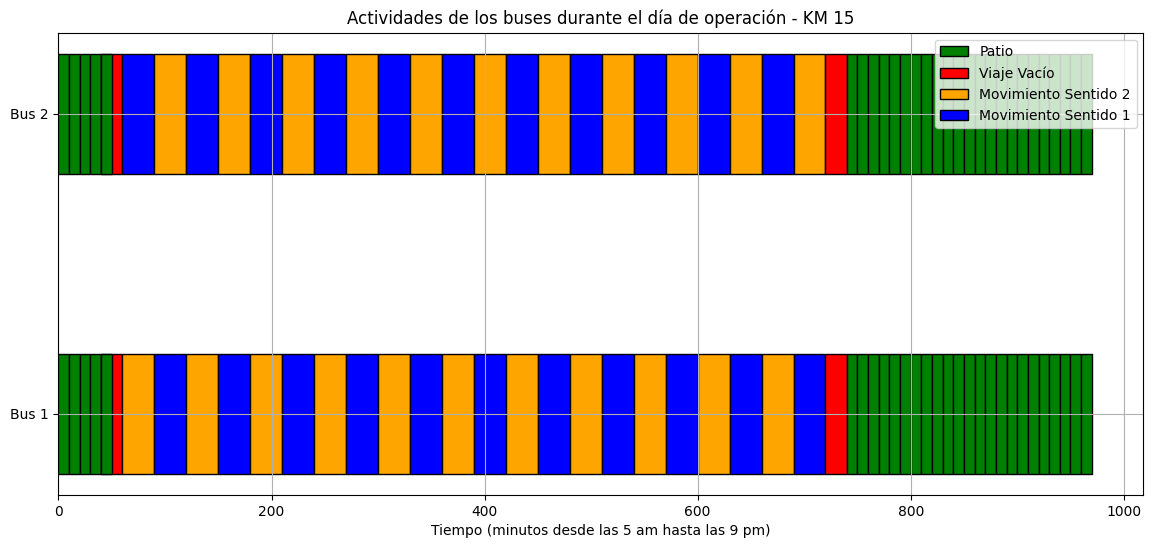


Métricas por Bus:
Bus 1: {'Pasajeros Transportados': 423.0, 'Viajes Realizados': 24.0, 'Capacidad de bus usada': 33.894230769230774, 'Utilización (%)': 95.65217391304348, 'Kilómetros Recorridos': 462.0, 'IPK (Pasajeros/km)': 0.9155844155844156}
Bus 2: {'Pasajeros Transportados': 423.0, 'Viajes Realizados': 24.0, 'Capacidad de bus usada': 33.894230769230774, 'Utilización (%)': 95.65217391304348, 'Kilómetros Recorridos': 462.0, 'IPK (Pasajeros/km)': 0.9155844155844156}
Completed visualization for route: KM 15



In [5]:
# ================================
# 6. Visualización de Resultados por Ruta
# ================================

def visualizar_resultados(nombre_ruta, datos_ruta, intervalo_minutos=10):
    """
    Genera visualizaciones de los resultados para una ruta específica.

    Args:
        nombre_ruta (str): Nombre de la ruta.
        datos_ruta (dict): Datos de la ruta que incluyen resultados y variables.
        intervalo_minutos (int): Duración de cada intervalo de tiempo en minutos.
    """
    resultados = datos_ruta['resultados']
    modelo = datos_ruta['modelo']
    x = datos_ruta['variables']['x']
    L_var = datos_ruta['variables']['L_var']
    p = datos_ruta['variables']['p']
    y = datos_ruta['variables']['y']
    z = datos_ruta['variables']['z']
    arcos = datos_ruta['arcos']
    delta = datos_ruta['delta']
    T_l_lprime = datos_ruta['T_l_lprime']
    K = datos_ruta['K']
    L = datos_ruta['L']
    S = datos_ruta['S']
    T = datos_ruta['T']

    if resultados['estado'] != GRB.OPTIMAL and resultados['estado'] != GRB.TIME_LIMIT:
        print(f"No hay resultados para la ruta {nombre_ruta}.")
        return

    # 1. Gráfica de demanda atendida vs no satisfecha
    tiempos = [t * intervalo_minutos for t in T]
    demanda_no_satisfecha_t = {s: [y[s, t].X for t in T] for s in S}
    demanda_atendida_t = {s: [sum(p[k, s, t].X for k in K) for t in T] for s in S}

    plt.figure(figsize=(14, 6))
    for s in S:
        plt.plot(tiempos, demanda_atendida_t[s], label=f'Demanda Atendida Sentido {s}')
        plt.plot(tiempos, demanda_no_satisfecha_t[s], label=f'Demanda No Satisfecha Sentido {s}', linestyle='--')
    plt.xlabel('Tiempo (minutos desde las 5 am)')
    plt.ylabel('Número de Pasajeros')
    plt.title(f'Demanda Atendida vs No Satisfecha - {nombre_ruta}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Diagrama de Gantt de los buses
    fig, ax = plt.subplots(figsize=(14, 6))
    colores = {
        'Movimiento_Sentido_1': 'blue',
        'Movimiento_Sentido_2': 'orange',
        'Viaje_Vacio': 'red',
        'Espera': 'grey',
        'Patio': 'green'
    }

    for k in K:
        for t in T:
            # Verificar si el bus está moviéndose en este intervalo
            moving = False
            for arco in arcos:
                if arco[0] == k and arco[2] <= t < arco[4] and x[arco].X > 0.5:
                    l, l_prime, t_start, t_end = arco[1], arco[3], arco[2], arco[4]
                    sentido = None
                    for s in S:
                        if delta.get((arco, s), 0) == 1:
                            sentido = s
                            break
                    if sentido == 1:
                        color = colores['Movimiento_Sentido_1']
                        label = 'Movimiento Sentido 1'
                    elif sentido == 2:
                        color = colores['Movimiento_Sentido_2']
                        label = 'Movimiento Sentido 2'
                    else:
                        color = colores['Viaje_Vacio']
                        label = 'Viaje Vacío'
                    duration = (t_end - t_start) * intervalo_minutos
                    # Dibujar solo si se está en el inicio del movimiento
                    if t == t_start:
                        ax.barh(k, duration, left=t_start * intervalo_minutos, height=0.4, color=color, edgecolor='black', label=label if (k == 1 and t_start == arco[2]) else "")
                    moving = True
                    break  # Solo un movimiento por intervalo

            # Verificar si el bus está en el patio
            if L_var[k, 'P', t].X > 0.5:
                ax.barh(k, intervalo_minutos, left=t * intervalo_minutos, height=0.4, color=colores['Patio'], edgecolor='black', label='Patio' if t == 0 else "")
                continue  # No puede estar haciendo otra actividad si está en el patio
            if moving:
                continue  # Si está moviéndose, no puede estar esperando

            # Si no está moviéndose y no está en el patio, está esperando en una cabecera
            ubicacion_actual = None
            for l in L:
                if L_var[k, l, t].X > 0.5:
                    ubicacion_actual = l
                    break
            if ubicacion_actual and ubicacion_actual != 'P':
                ax.barh(k, intervalo_minutos, left=t * intervalo_minutos, height=0.4, color=colores['Espera'], edgecolor='black', label='Espera' if t == 0 else "")

    # Eliminar etiquetas duplicadas en la leyenda
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

    ax.set_yticks(K)
    ax.set_yticklabels([f'Bus {k}' for k in K])
    ax.set_xlabel('Tiempo (minutos desde las 5 am hasta las 9 pm)')
    ax.set_title(f'Actividades de los buses durante el día de operación - {nombre_ruta}')
    plt.grid(True)
    plt.show()

    # 3. Gráfica de Utilización de los Buses
    print("\nMétricas por Bus:")
    for k in K:
        bus_metrics = resultados['metrics_bus'][k]
        print(f"Bus {k}: {bus_metrics}")



# ================================
# 7. Ejecución de Visualización para Todas las Rutas
# ================================

for ruta in lista_rutas:
    print(f"Visualizing results for route: {ruta}")
    visualizar_resultados(ruta, resultados_totales[ruta])
    print(f"Completed visualization for route: {ruta}\n")

## **Evaluación de sensibilidad del intervalo temporal**
En esta sección se evalúa el comportamiento del modelo al reducir el tamaño del intervalo que define la temporalidad de las predicciones y la toma de decisiones. Para este caso, se establece un intervalo un 50% inferior al establecido en el análisis anterior, es decir, de 5 minutos.

In [ ]:
# ================================
# 1. Definición de Parámetros
# ================================

intervalo_minutos = 5
hora_inicio = 5 * 60  # 5 am en minutos
hora_fin = 21 * 60    # 9 pm en minutos

# Demanda predicha para todas las rutas y sentidos
demanda_predicha = {
    'PRADERA_27_sentido_1': [18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22,
        23, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22,
        22, 22, 22, 22, 21, 21, 21, 21, 21, 20, 20, 20, 19, 19, 19, 19, 18,
        18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 15, 14, 14, 14, 14, 14, 13,
        13, 13, 13, 13, 13],
    'PRADERA_27_sentido_2': [18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22,
        23, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22,
        22, 22, 22, 22, 21, 21, 21, 21, 21, 20, 20, 20, 19, 19, 19, 19, 18,
        18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 15, 14, 14, 14, 14, 14, 13,
        13, 13, 13, 13, 13],
    'PANZENU_sentido_1': [10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
        14, 15, 15, 15, 15, 15, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 17, 17, 17, 17,
        17, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 13, 13, 13, 12, 12, 12,
        11, 11, 10, 10, 10,  9,  9,  9,  8,  8,  7,  6,  6,  6,  6,  5,  5,
         5,  5,  5,  4,  4],
    'PANZENU_sentido_2': [10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
        14, 15, 15, 15, 15, 15, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 17, 17, 17, 17,
        17, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 13, 13, 13, 12, 12, 12,
        11, 11, 10, 10, 10,  9,  9,  9,  8,  8,  7,  6,  6,  6,  6,  5,  5,
         5,  5,  5,  4,  4],
                             }
# Definición de rutas y sus parámetros
rutas = {
    'PRADERA_27': {
        'sentidos': {1: [], 2: []},  # Se llenarán más adelante
        'B': 8,  # Número de buses disponibles para esta ruta
        'C': 52, # Capacidad de cada bus
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 41, 
            ('C2', 'C1'): 39,
            ('C1', 'C1'): 5,  
            ('C2', 'C2'): 5,
            ('P', 'P'): 0     # Permanencia en el patio: sin costo
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    },
    'PANZENU': {
        'sentidos': {1: [], 2: []},
        'B': 7,
        'C': 52,
        'T_l_lprime': {
            ('P', 'C1'): 15,  
            ('P', 'C2'): 15,  
            ('C1', 'P'): 15,
            ('C2', 'P'): 15,
            ('C1', 'C2'): 39,
            ('C2', 'C1'): 36,
            ('C1', 'C1'): 5,
            ('C2', 'C2'): 5,
            ('P', 'P'): 0
        },
        'c_mov': 10,        # Costo fijo por movimiento
        'c_bus': 5,         # Costo por mantener el bus en operación
        'c_ingreso': 2,     # Ingreso por pasajero transportado
        'c_espera': 5       # Costo de permanencia en cabeceras
    }
}

# Función para ajustar tiempos de viaje al número de intervalos
def ajustar_tiempos(tiempos, intervalo_minutos=5):
    tiempos_ajustados = {}
    for (origen, destino), tiempo in tiempos.items():
        tiempos_ajustados[(origen, destino)] = int(np.ceil(tiempo / intervalo_minutos))
    return tiempos_ajustados

# Ajustar tiempos de viaje para cada ruta
for ruta, parametros in rutas.items():
    rutas[ruta]['T_l_lprime'] = ajustar_tiempos(parametros['T_l_lprime'], intervalo_minutos)

# Asignar las demandas predichas a cada ruta y sentido
for ruta in rutas.keys():
    for s in [1, 2]:
        key = f"{ruta}_sentido_{s}"
        rutas[ruta]['sentidos'][s] = demanda_predicha[key]


In [ ]:
# ================================
# 3. Ejecución del Modelo para Todas las Rutas
# ================================

# Almacenar resultados de todas las rutas
resultados_totales = {}

# Lista de rutas a optimizar
lista_rutas = list(rutas.keys())

for ruta in lista_rutas:
    print(f"Optimizing route: {ruta}")
    resultados, modelo, x, L_var, p, y, z, arcos, delta, T_l_lprime, K, L, S, T, demanda = optimizar_ruta(ruta, rutas[ruta])
    
    resultados_totales[ruta] = {
        'resultados': resultados,
        'modelo': modelo,
        'variables': {
            'x': x,
            'L_var': L_var,
            'p': p,
            'y': y,
            'z': z
        },
        'arcos': arcos,
        'delta': delta,
        'T_l_lprime': T_l_lprime,
        'K': K,
        'L': L,
        'S': S,
        'T': T,
        'demanda': demanda
    }

    print(f"Completed optimization for route: {ruta}\n")

# Presentar resultados para cada ruta
for ruta in lista_rutas:
    resultados = resultados_totales[ruta]['resultados']
    presentar_resultados_computacionales(ruta, resultados)
    presentar_metricas_globales(ruta, resultados)
    presentar_metricas_por_bus(ruta, resultados)